In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.loss_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def _adaboost_loss(self, y, y_pred):
        return np.mean(np.exp(-y * y_pred))

    def _binary_crossentropy_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y, loss_type='logistic'):
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights)
            y_pred = self._sigmoid(z)

            if loss_type == 'logistic':
                loss = self._logistic_loss(y, y_pred)
            elif loss_type == 'adaboost':
                loss = self._adaboost_loss(y, y_pred)
            elif loss_type == 'binary_crossentropy':
                loss = self._binary_crossentropy_loss(y, y_pred)
            else:
                raise ValueError("Invalid loss type!")

            gradient = np.dot(X.T, (y_pred - y)) / m
            self.weights -= self.learning_rate * gradient

            self.loss_history.append(loss)

    def predict(self, X):
        z = np.dot(X, self.weights)
        y_pred = self._sigmoid(z)
        return (y_pred >= 0.5).astype(int)

    def plot_loss_curve(self):
        plt.plot(self.loss_history)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.show()


In [ ]:
# Загрузка данных
data = np.loadtxt('data.txt', delimiter=',')

# Разделение на признаки и метки
X = data[:, :-1]
y = data[:, -1]

# Нормализация признаков
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Разделение на тренировочную и тестовую выборки
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

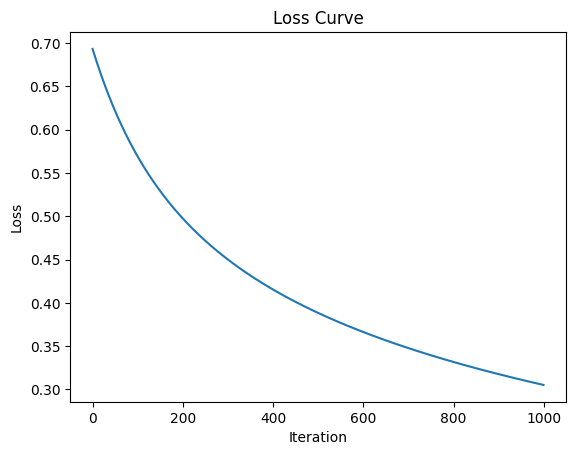

Train Accuracy: 0.918869644484959
Test Accuracy: 0.9418181818181818


In [ ]:
# Создание и обучение модели
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train, loss_type='logistic')

# Визуализация кривой обучения
model.plot_loss_curve()

# Оценка качества модели
train_accuracy = np.mean(model.predict(X_train) == y_train)
test_accuracy = np.mean(model.predict(X_test) == y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

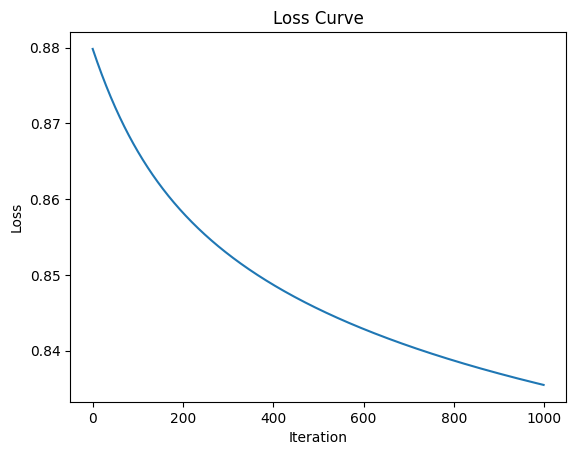

Train Accuracy: 0.918869644484959
Test Accuracy: 0.9418181818181818


In [ ]:
# Создание и обучение модели
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train, loss_type='adaboost')

# Визуализация кривой обучения
model.plot_loss_curve()

# Оценка качества модели
train_accuracy = np.mean(model.predict(X_train) == y_train)
test_accuracy = np.mean(model.predict(X_test) == y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

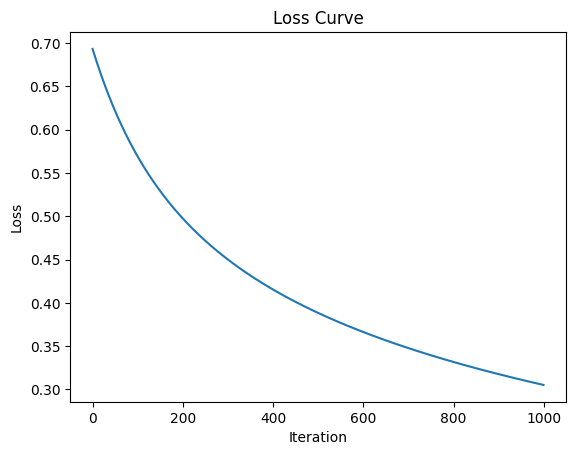

Train Accuracy: 0.918869644484959
Test Accuracy: 0.9418181818181818


In [ ]:
# Создание и обучение модели
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train, loss_type='binary_crossentropy')

# Визуализация кривой обучения
model.plot_loss_curve()

# Оценка качества модели
train_accuracy = np.mean(model.predict(X_train) == y_train)
test_accuracy = np.mean(model.predict(X_test) == y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

В процессе лабораторной работы были исследованы три функции потерь: Adaboost, binary_crossentropy и logistic.

Adaboost представляет собой адаптивный бустинг-алгоритм, объединяющий несколько слабых обучающих моделей для создания более мощной модели. Он минимизирует экспоненциальную потерю, уделяя больше внимания неправильно классифицированным примерам. Adaboost подходит для задач классификации и часто применяется в ансамблевых методах.

Binary_crossentropy - это функция потерь, широко используемая в задачах бинарной классификации. Она минимизирует логарифмическую потерю между предсказанными и истинными значениями. Binary_crossentropy основывается на принципе максимального правдоподобия и эффективно работает с вероятностными моделями.

Logistic, также известная как логистическая функция потерь, - это универсальное название для функций потерь, основанных на логистической функции. Она используется в задачах бинарной и многоклассовой классификации. Logistic минимизирует потерю, учитывающую вероятности принадлежности объектов к разным классам.